In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.simplefilter('ignore')

In [2]:
#load the dataset
data = pd.read_csv(r'C:\Users\M.dhiinesh\Desktop\sofia\thyroidData.csv')


In [3]:
data.head()

,age,gender,Thyroxine,queryThyroxine,antithyroid,sick,pregnant,I131treatment,hypothyroid,hyperthyroid,lithium,tumor,hypopituitary,TSH,T3,TT4,T4U,FTI,referralSource,class
0,41.0,F,f,f,f,f,f,f,f,f,f,f,f,1.30,2.5,125.0,1.14,109.0,SVHC,negative
1,23.0,F,f,f,f,f,f,f,f,f,f,NaN,f,4.10,2.0,102.0,NaN,NaN,other,negative
2,46.0,M,f,f,f,f,f,f,f,f,f,NaN,f,0.98,NaN,109.0,0.91,120.0,other,negative
3,70.0,F,t,f,f,f,f,f,f,f,f,NaN,f,0.16,1.9,175.0,NaN,NaN,other,negative
4,70.0,F,f,f,f,f,f,f,f,f,f,f,f,0.72,1.2,61.0,0.87,70.0,SVI,negative


In [4]:
data.nunique()

age                93
gender              2
Thyroxine           2
queryThyroxine      2
antithyroid         2
sick                2
pregnant            2
I131treatment       2
hypothyroid         2
hyperthyroid        2
lithium             2
tumor               2
hypopituitary       2
TSH               261
T3                 64
TT4               212
T4U               137
FTI               203
referralSource      5
class               3
dtype: int64

In [5]:
data.shape

(2690, 20)

In [6]:
data.columns

Index(['age', 'gender', 'Thyroxine', 'queryThyroxine', 'antithyroid', 'sick',
       'pregnant', 'I131treatment', 'hypothyroid', 'hyperthyroid', 'lithium',
       'tumor', 'hypopituitary', 'TSH', 'T3', 'TT4', 'T4U', 'FTI',
       'referralSource', 'class'],
      dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2690 entries, 0 to 2689
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             2689 non-null   float64
 1   gender          2690 non-null   object 
 2   Thyroxine       2690 non-null   object 
 3   queryThyroxine  2690 non-null   object 
 4   antithyroid     2690 non-null   object 
 5   sick            2690 non-null   object 
 6   pregnant        2690 non-null   object 
 7   I131treatment   2690 non-null   object 
 8   hypothyroid     2690 non-null   object 
 9   hyperthyroid    2690 non-null   object 
 10  lithium         2690 non-null   object 
 11  tumor           1494 non-null   object 
 12  hypopituitary   2690 non-null   object 
 13  TSH             2419 non-null   float64
 14  T3              2120 non-null   float64
 15  TT4             2518 non-null   float64
 16  T4U             2410 non-null   float64
 17  FTI             2412 non-null   f

In [8]:
data.isnull().sum()

age                  1
gender               0
Thyroxine            0
queryThyroxine       0
antithyroid          0
sick                 0
pregnant             0
I131treatment        0
hypothyroid          0
hyperthyroid         0
lithium              0
tumor             1196
hypopituitary        0
TSH                271
T3                 570
TT4                172
T4U                280
FTI                278
referralSource       0
class                0
dtype: int64

In [9]:
data.isnull().mean()

age               0.000372
gender            0.000000
Thyroxine         0.000000
queryThyroxine    0.000000
antithyroid       0.000000
sick              0.000000
pregnant          0.000000
I131treatment     0.000000
hypothyroid       0.000000
hyperthyroid      0.000000
lithium           0.000000
tumor             0.444610
hypopituitary     0.000000
TSH               0.100743
T3                0.211896
TT4               0.063941
T4U               0.104089
FTI               0.103346
referralSource    0.000000
class             0.000000
dtype: float64

In [10]:
data.columns

Index(['age', 'gender', 'Thyroxine', 'queryThyroxine', 'antithyroid', 'sick',
       'pregnant', 'I131treatment', 'hypothyroid', 'hyperthyroid', 'lithium',
       'tumor', 'hypopituitary', 'TSH', 'T3', 'TT4', 'T4U', 'FTI',
       'referralSource', 'class'],
      dtype='object')

In [11]:
# dropping data for reducation requirment 
data.drop('referralSource', axis = 1, inplace = True)

In [12]:
data.head(1)

,age,gender,Thyroxine,queryThyroxine,antithyroid,sick,pregnant,I131treatment,hypothyroid,hyperthyroid,lithium,tumor,hypopituitary,TSH,T3,TT4,T4U,FTI,class
0,41.0,F,f,f,f,f,f,f,f,f,f,f,f,1.3,2.5,125.0,1.14,109.0,negative


In [13]:
#checking a duplicate 
data.duplicated().sum()

29

In [14]:
#dropping duplicate 
data = data.drop_duplicates()

In [15]:
data.duplicated().any()

False

In [16]:
data.shape

(2661, 19)

In [17]:
data['tumor'].value_counts()

f    1437
t      41
Name: tumor, dtype: int64

In [18]:
data['tumor'].isnull().mean()

0.4445697106350996

# Imputation

In [19]:
# replace null value with mode
data['tumor'].fillna(data['tumor'].mode()[0], inplace = True)

In [20]:
data['tumor'].isnull().mean()

0.0

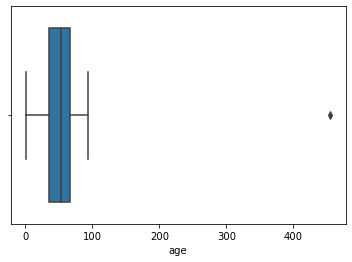

In [21]:
# checking the outlier for age column to the process of imputation
sns.boxplot(data['age'])
plt.show()

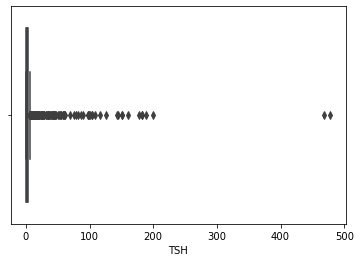

In [22]:
# checking the outlier for TSH column to the process of imputation
sns.boxplot(data['TSH'])
plt.show()

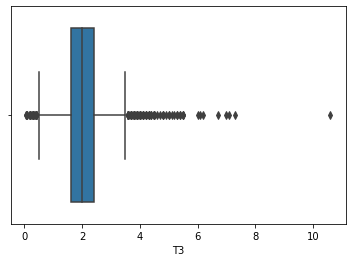

In [23]:
# checking the outlier for T3 column to the process of imputation
sns.boxplot(data['T3'])
plt.show()

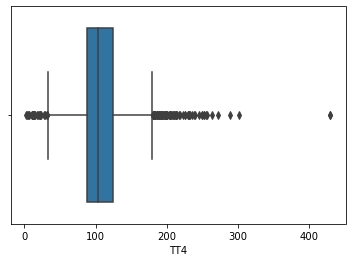

In [24]:
# checking the outlier for TT4 column to the process of imputation
sns.boxplot(data['TT4'])
plt.show()

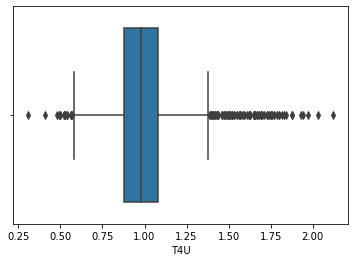

In [25]:
# checking the outlier for T4U column to the process of imputation
sns.boxplot(data['T4U'])
plt.show()

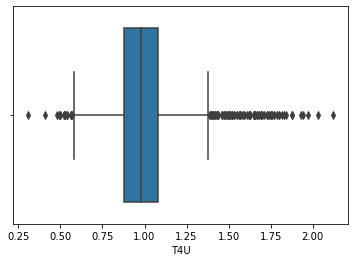

In [26]:
# checking the outlier for T4U column to the process of imputation
sns.boxplot(data['T4U'])
plt.show()

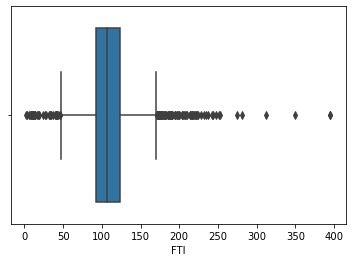

In [27]:
# checking the outlier for FTI column to the process of imputation
sns.boxplot(data['FTI'])
plt.show()

In [28]:
#mean values of age column

data['age'].mean()
#filling missing values

data['age'].fillna(data['age'].mean(),inplace=True)

In [29]:
#median values of TSH column

data['TSH'].median()
#filling missing values

data['TSH'].fillna(data['TSH'].median(),inplace=True)

In [30]:
#median values of T3 column

data['T3'].median()
#filling missing values

data['T3'].fillna(data['T3'].median(),inplace=True)

In [31]:
#median values of TT4 column

data['TT4'].median()
data['TT4'].fillna(data['TT4'].median(),inplace=True)

In [32]:
#median values of T4U column

data['T4U'].median()
#filling missing values

data['T4U'].fillna(data['T4U'].median(),inplace=True)

In [33]:
#mean values of Item_Weight column

data['FTI'].median()
#filling missing values

data['FTI'].fillna(data['FTI'].median(),inplace=True)

In [34]:
#check missing values

data.isnull().sum()

age               0
gender            0
Thyroxine         0
queryThyroxine    0
antithyroid       0
sick              0
pregnant          0
I131treatment     0
hypothyroid       0
hyperthyroid      0
lithium           0
tumor             0
hypopituitary     0
TSH               0
T3                0
TT4               0
T4U               0
FTI               0
class             0
dtype: int64

## Exploratory Data Analysis

In [35]:
#distribution of target variable

In [36]:
data['class'].value_counts()

negative                     2533
increased binding protein     120
decreased binding protein       8
Name: class, dtype: int64

In [37]:
data['class']=data['class'].replace({'decreased binding protein':'positive'})

In [38]:
data['class'].value_counts()

negative                     2533
increased binding protein     120
positive                        8
Name: class, dtype: int64

In [39]:
data['class']=data['class'].replace({'increased binding protein':'positive'})

In [40]:
data['class'].value_counts()

negative    2533
positive     128
Name: class, dtype: int64

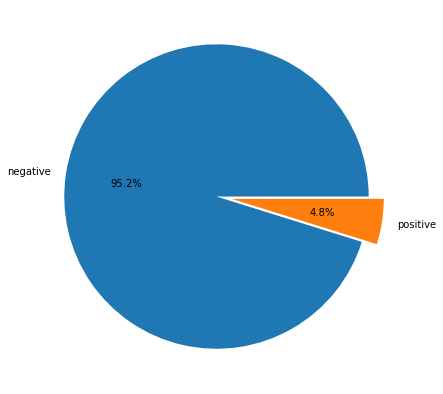

In [41]:
plt.figure(figsize=(12,7))
labels = ['negative','positive']
explode = [0,0.1]
thy_val = data['class'].value_counts().values
plt.pie(thy_val, explode,labels, autopct ="%1.1f%%")
plt.show()

1. there are total of 95.5% negative class
2. there is only 4.5% positive class

In [42]:
# distribution of numerical data
data_num = data.select_dtypes(include = np.number)
data_num.head(2)

,age,TSH,T3,TT4,T4U,FTI
0,41.0,1.3,2.5,125.0,1.14,109.0
1,23.0,4.1,2.0,102.0,0.98,107.0


In [43]:
data_num.columns

Index(['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI'], dtype='object')

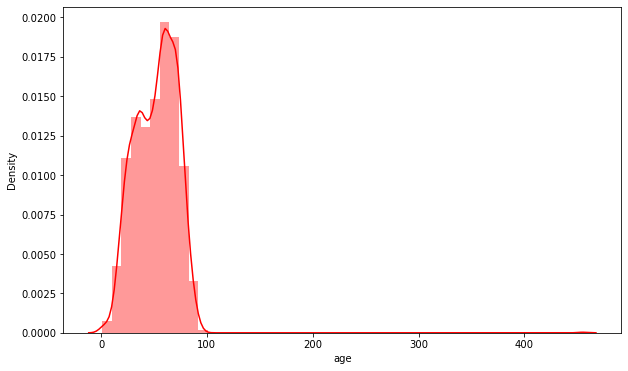

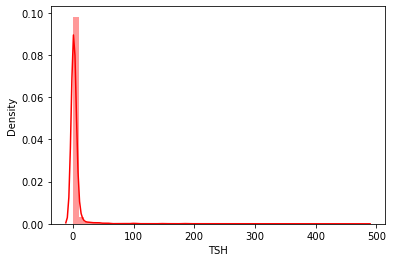

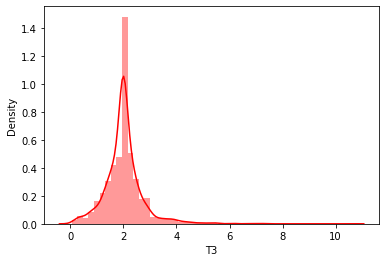

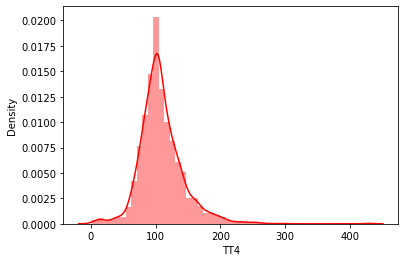

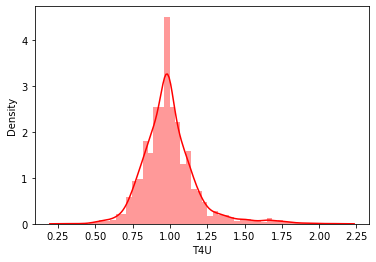

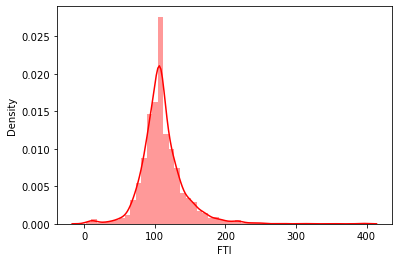

In [44]:
plt.figure(figsize = (10, 6))

for i in data_num.columns:
    sns.distplot(data[i], color = 'red')
    plt.show()

# handling outliers

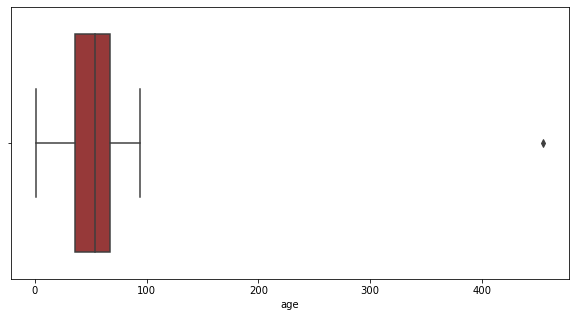

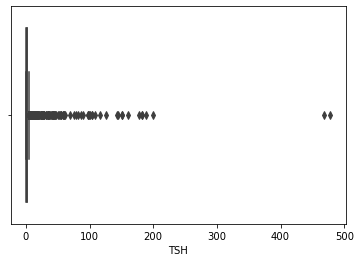

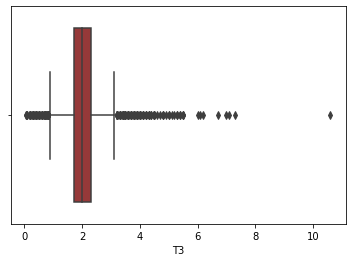

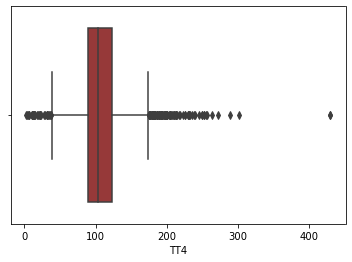

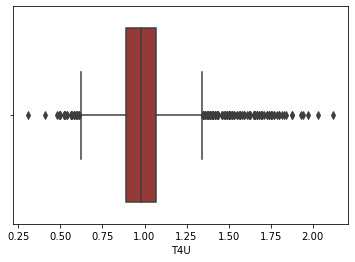

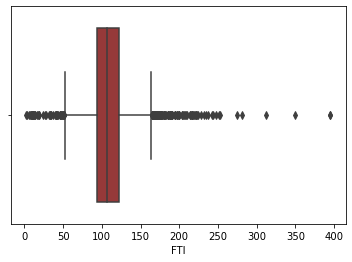

In [45]:
plt.figure(figsize = (10,5))
for i in data_num.columns:
    sns.boxplot(data[i], color = 'brown')
    plt.show()
    

In [46]:
#age
Q1 = data.age.quantile(0.25)
Q3 = data.age.quantile(0.75)

IQR = Q3 -Q1
data = data[(data.age >= Q1-1.5*IQR) & (data.age <= Q3+1.5*IQR)]

In [47]:
# TSH
Q1 = data.TSH.quantile(0.25)
Q3 = data.TSH.quantile(0.75)

IQR = Q3 -Q1
data = data[(data.TSH >= Q1-1.5*IQR) & (data.TSH <= Q3+1.5*IQR)]

# T3
Q1 = data.T3.quantile(0.25)
Q3 = data.T3.quantile(0.75)

IQR = Q3 -Q1
data = data[(data.T3 >= Q1-1.5*IQR) & (data.T3 <= Q3+1.5*IQR)]

# TT4
Q1 = data.TT4.quantile(0.25)
Q3 = data.TT4.quantile(0.75)

IQR = Q3 -Q1
data = data[(data.TT4 >= Q1-1.5*IQR) & (data.TT4 <= Q3+1.5*IQR)]

# T4U
Q1 = data.T4U.quantile(0.25)
Q3 = data.T4U.quantile(0.75)

IQR = Q3 -Q1
data = data[(data.T4U >= Q1-1.5*IQR) & (data.T4U <= Q3+1.5*IQR)]

# FTI
Q1 = data.FTI.quantile(0.25)
Q3 = data.FTI.quantile(0.75)

IQR = Q3 -Q1
data = data[(data.FTI >= Q1-1.5*IQR) & (data.FTI <= Q3+1.5*IQR)]

<AxesSubplot:xlabel='FTI'>

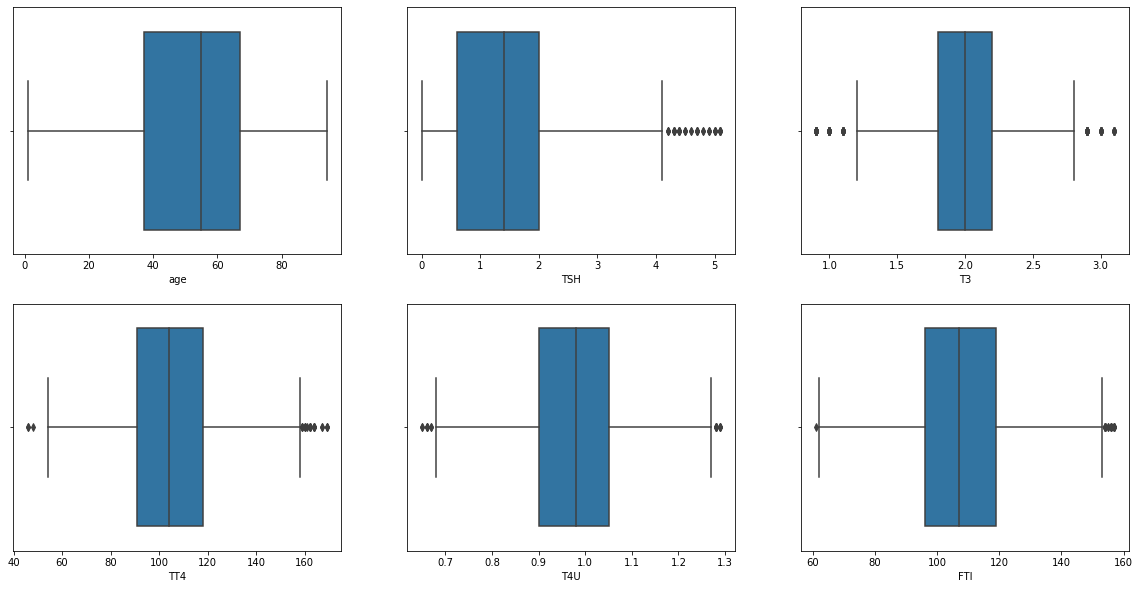

In [48]:
fig, ax = plt.subplots(2,3, figsize =(20,10))

sns.boxplot(data['age'], ax = ax[0][0])
sns.boxplot(data['TSH'], ax = ax[0][1])
sns.boxplot(data['T3'], ax = ax[0][2])
sns.boxplot(data['TT4'], ax = ax[1][0])
sns.boxplot(data['T4U'], ax = ax[1][1])
sns.boxplot(data['FTI'], ax = ax[1][2])

In [49]:
data.columns

Index(['age', 'gender', 'Thyroxine', 'queryThyroxine', 'antithyroid', 'sick',
       'pregnant', 'I131treatment', 'hypothyroid', 'hyperthyroid', 'lithium',
       'tumor', 'hypopituitary', 'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'class'],
      dtype='object')

In [50]:
data.select_dtypes(include = object).columns

Index(['gender', 'Thyroxine', 'queryThyroxine', 'antithyroid', 'sick',
       'pregnant', 'I131treatment', 'hypothyroid', 'hyperthyroid', 'lithium',
       'tumor', 'hypopituitary', 'class'],
      dtype='object')

In [51]:
data_num.columns

Index(['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI'], dtype='object')

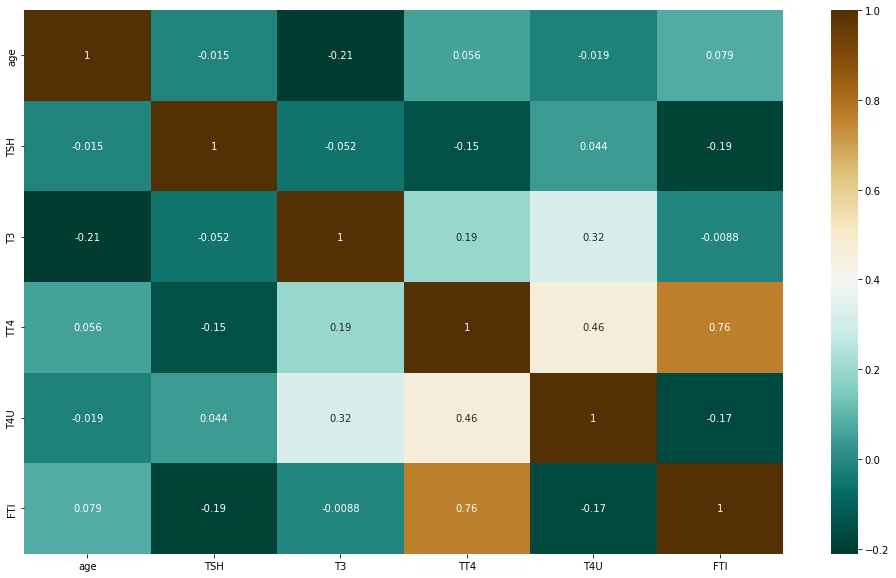

In [52]:
## analyze the relationship between dependent and independent variable using correlation matrix / heatmap
plt.figure(figsize = (17,10))
#data_num = ['age','TSH','T3','TT4','T4U','FTI']
cor = data.corr()
sns.heatmap(cor, annot =True, cmap='BrBG_r')
plt.show()

<AxesSubplot:xlabel='hypopituitary', ylabel='count'>

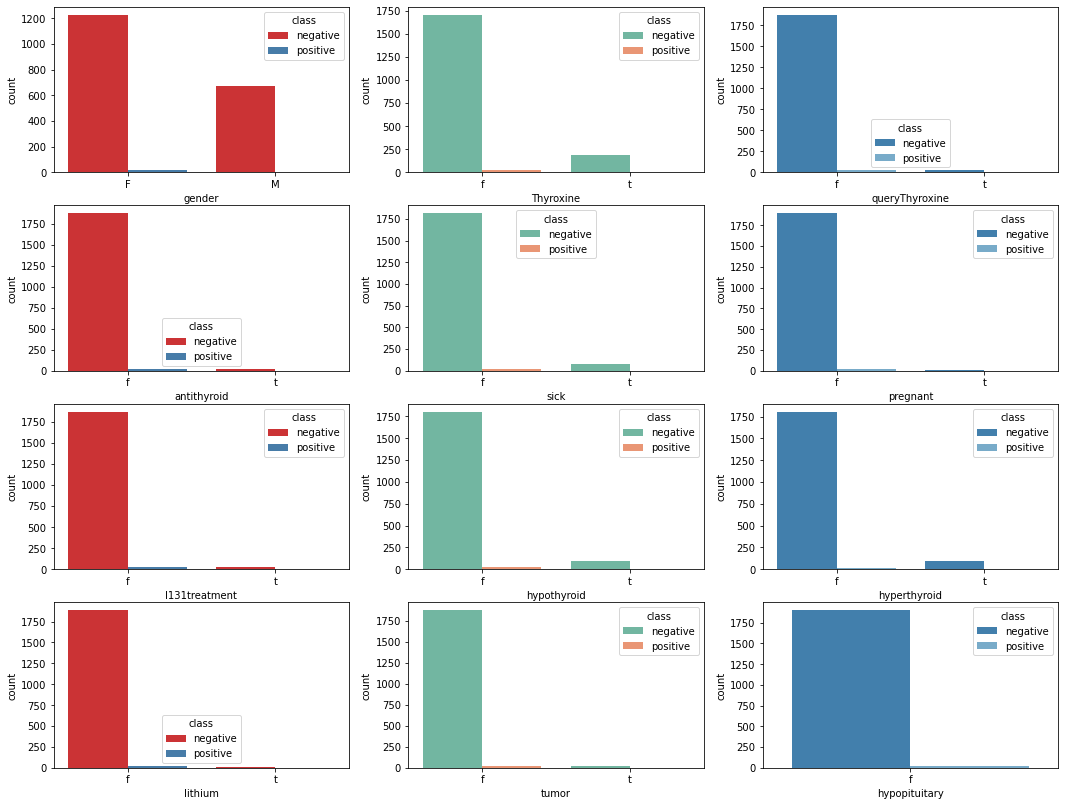

In [53]:
# count plot to analyse the relation between dependent and independent variables
fig, ax= plt.subplots(4,3,figsize = (18,14))
sns.countplot(x='gender', hue = 'class', data = data, palette = 'Set1', ax =ax[0][0])
sns.countplot(x='Thyroxine', hue = 'class', data = data, palette = 'Set2', ax =ax[0][1])
sns.countplot(x='queryThyroxine', hue = 'class', data = data, palette = 'tab20c', ax =ax[0][2])
sns.countplot(x='antithyroid', hue = 'class', data = data, palette = 'Set1', ax =ax[1][0])
sns.countplot(x='sick', hue = 'class', data = data, palette = 'Set2', ax =ax[1][1])
sns.countplot(x='pregnant', hue = 'class', data = data, palette = 'tab20c', ax =ax[1][2])
sns.countplot(x='I131treatment', hue = 'class', data = data, palette = 'Set1', ax =ax[2][0])
sns.countplot(x='hypothyroid', hue = 'class', data = data, palette = 'Set2', ax =ax[2][1])
sns.countplot(x='hyperthyroid', hue = 'class', data = data, palette = 'tab20c', ax =ax[2][2])
sns.countplot(x='lithium', hue = 'class', data = data, palette = 'Set1', ax =ax[3][0])
sns.countplot(x='tumor', hue = 'class', data = data, palette = 'Set2', ax =ax[3][1])
sns.countplot(x='hypopituitary', hue = 'class', data = data, palette = 'tab20c', ax =ax[3][2])

In [54]:
!pip install -U klib

  Attempting uninstall: klib
    Found existing installation: klib 1.0.4
    Uninstalling klib-1.0.4:
      Successfully uninstalled klib-1.0.4


In [55]:
import klib

In [59]:
klib.corr_mat(data) # returns a color-encoded correlation matrix

,age,TSH,T3,TT4,T4U,FTI
age,1.00,-0.02,-0.21,0.06,-0.02,0.08
TSH,-0.02,1.00,-0.05,-0.15,0.04,-0.19
T3,-0.21,-0.05,1.00,0.19,0.32,-0.01
TT4,0.06,-0.15,0.19,1.00,0.46,0.76
T4U,-0.02,0.04,0.32,0.46,1.00,-0.17
FTI,0.08,-0.19,-0.01,0.76,-0.17,1.00


<AxesSubplot:title={'center':'Feature-correlation (pearson)'}>

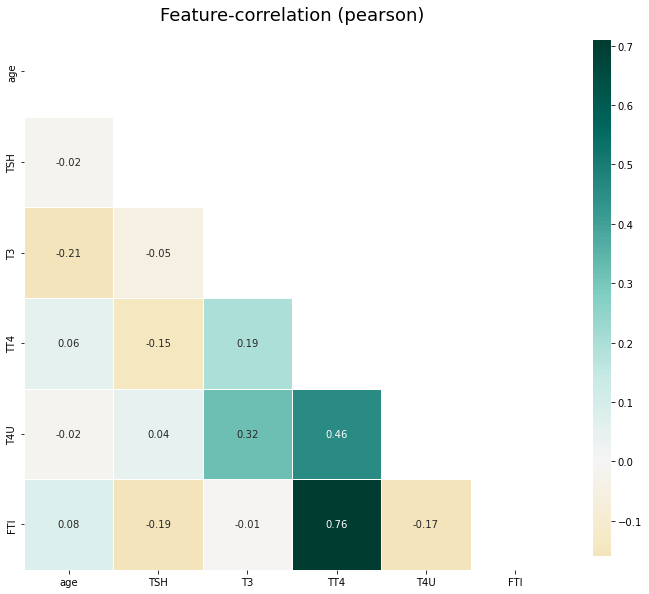

In [60]:
klib.corr_plot(data) # returns a color-encoded heatmap, ideal for correlations

In [61]:
klib.missingval_plot(data) # returns a figure containing information about missing values


No missing values found in the dataset.


# Feature Engineering

In [62]:
# Handle Categorical Data using Label encoding Technique

objlist = data.select_dtypes(include = 'object').columns
print(objlist)

Index(['gender', 'Thyroxine', 'queryThyroxine', 'antithyroid', 'sick',
       'pregnant', 'I131treatment', 'hypothyroid', 'hyperthyroid', 'lithium',
       'tumor', 'hypopituitary', 'class'],
      dtype='object')


In [63]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for x in objlist:
    data[x] = le.fit_transform(data[x])

# Min Max Scaling

In [64]:
#importing sklearn Min Max Scaler class which is for Standardization 
from sklearn.preprocessing import MinMaxScaler 
 
mm = MinMaxScaler() # creating an instance of the class object 
data_new_mm = pd.DataFrame(mm.fit_transform(data), columns=data.columns)  #fit and transforming MinMaxScaler the dataframe  

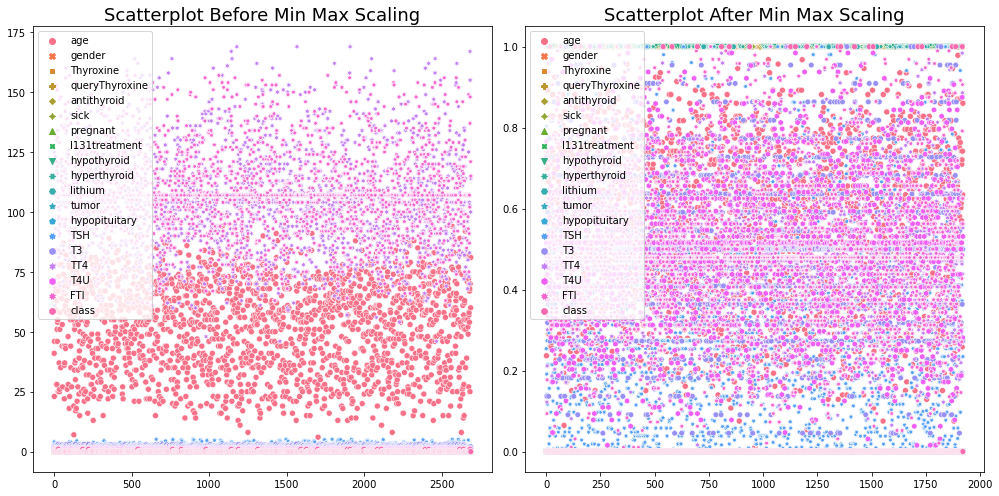

In [65]:
# plotting the scatterplot of before and after Min Max Scaling 
plt.figure(figsize=(14,7)) 
plt.subplot(1,2,1) 
plt.title("Scatterplot Before Min Max Scaling", fontsize=18) 
sns.scatterplot(data = data, color="blue") 
plt.subplot(1,2,2) 
plt.title("Scatterplot After Min Max Scaling", fontsize=18) 
sns.scatterplot(data = data_new_mm, color="red") 
plt.tight_layout() 
plt.show() 


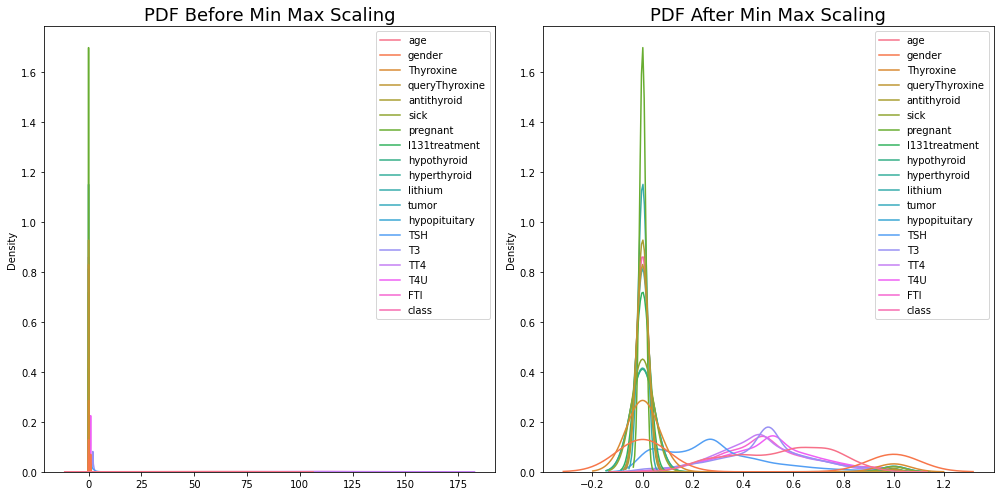

In [66]:
# plotting the scatterplot of before and after Min Max Scaling 
plt.figure(figsize=(14,7)) 
plt.subplot(1,2,1) 
plt.title("PDF Before Min Max Scaling", fontsize=18) 
sns.kdeplot(data = data, color="blue") 
plt.subplot(1,2,2) 
plt.title("PDF After Min Max Scaling", fontsize=18) 
sns.kdeplot(data = data_new_mm, color="red") 
plt.tight_layout() 
plt.show() 


Min Max Normalization will perform best when the maximum and minimum value is very distinct and known. 

In [67]:
## Chi-Square test bcz most features are categorical in nature
from sklearn.feature_selection import chi2

In [68]:
df = data[['gender', 'Thyroxine', 'queryThyroxine', 'antithyroid', 'sick',
       'pregnant', 'I131treatment', 'hypothyroid', 'hyperthyroid', 'lithium',
       'tumor', 'hypopituitary', 'class']]

In [69]:
x1 = df.drop('class', axis = 'columns')
y1 = df['class']

In [70]:
f_score = chi2(x1,y1)
f_score

(array([ 2.0832583 ,  0.74171809,  0.30279094,  0.24223275,  0.99315429,
        12.14466806,  0.93841013,  0.02575119,  3.01917199,  0.15745129,
         9.2783528 ,         nan]),
 array([1.48921992e-01, 3.89111069e-01, 5.82138018e-01, 6.22598133e-01,
        3.18972658e-01, 4.92284030e-04, 3.32687050e-01, 8.72509457e-01,
        8.22854689e-02, 6.91513975e-01, 2.31877856e-03,            nan]))

In [71]:
p_value = pd.Series(f_score[1], index = x1.columns)
p_value = p_value.sort_values(ascending = True)
p_value

pregnant          0.000492
tumor             0.002319
hyperthyroid      0.082285
gender            0.148922
sick              0.318973
I131treatment     0.332687
Thyroxine         0.389111
queryThyroxine    0.582138
antithyroid       0.622598
lithium           0.691514
hypothyroid       0.872509
hypopituitary          NaN
dtype: float64

In [72]:
cols = []

for i in p_value.index:
    if p_value[i] <= 0.05:
        print(i, ' :- Reject Null Hypothesis')
    else:
        print(i, ' :- Accept Null Hypothesis')
        cols.append(i)

pregnant  :- Reject Null Hypothesis
tumor  :- Reject Null Hypothesis
hyperthyroid  :- Accept Null Hypothesis
gender  :- Accept Null Hypothesis
sick  :- Accept Null Hypothesis
I131treatment  :- Accept Null Hypothesis
Thyroxine  :- Accept Null Hypothesis
queryThyroxine  :- Accept Null Hypothesis
antithyroid  :- Accept Null Hypothesis
lithium  :- Accept Null Hypothesis
hypothyroid  :- Accept Null Hypothesis
hypopituitary  :- Accept Null Hypothesis


In [73]:
cols

['hyperthyroid',
 'gender',
 'sick',
 'I131treatment',
 'Thyroxine',
 'queryThyroxine',
 'antithyroid',
 'lithium',
 'hypothyroid',
 'hypopituitary']

In [74]:
data.drop(cols,axis=1,inplace=True)

In [75]:
data.head(2)

,age,pregnant,tumor,TSH,T3,TT4,T4U,FTI,class
0,41.0,0,0,1.3,2.5,125.0,1.14,109.0,0
1,23.0,0,0,4.1,2.0,102.0,0.98,107.0,0


# Split the dataset

In [76]:

X = data.drop(['class'], axis = 1)
y = data['class']

In [77]:
X

,age,pregnant,tumor,TSH,T3,TT4,T4U,FTI
0,41.0,0,0,1.30,2.5,125.0,1.14,109.0
1,23.0,0,0,4.10,2.0,102.0,0.98,107.0
2,46.0,0,0,0.98,2.0,109.0,0.91,120.0
4,70.0,0,0,0.72,1.2,61.0,0.87,70.0
6,59.0,0,0,1.40,2.0,72.0,0.92,78.0
...,...,...,...,...,...,...,...,...
2682,68.0,0,0,1.00,2.0,103.0,1.01,102.0
2684,25.0,0,0,1.90,1.7,167.0,1.21,137.0
2685,70.0,0,0,2.70,2.0,155.0,1.05,148.0
2688,60.0,0,0,1.40,2.0,100.0,0.83,121.0


In [78]:
y

0       0
1       0
2       0
4       0
6       0
       ..
2682    0
2684    1
2685    0
2688    0
2689    0
Name: class, Length: 1922, dtype: int32

In [79]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix

In [80]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=32)

# Model Building & Evaluation


In [81]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier

In [82]:
# Fit the Logistic Regression Model

# create the instance of logistic regression model
lr = LogisticRegression()

# fit the model
lr.fit(X_train, y_train)

LogisticRegression()

In [83]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1537, 8), (385, 8), (1537,), (385,))

In [84]:
# Naive Bayes Classifier
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()

# fit the model
clf.fit(X_train, y_train)

GaussianNB()

In [85]:
# Support Vector Machine
from sklearn import svm
classifier = svm.SVC(kernel = 'rbf')

#fit the model
classifier.fit(X_train, y_train)

SVC()

In [86]:
# Fit the Decision Tree Model

# create the instance of DT model
dt = DecisionTreeClassifier()

# fit the model
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [87]:
# Make a prediction for the training set
y_pred_tr = lr.predict(X_train)

In [88]:
# Make a prediction for the testing set for Logistic Regression
y_pred_lr = lr.predict(X_test)

In [89]:
y_pred_nb = clf.predict(X_test)

In [90]:
y_pred_svc = classifier.predict(X_test)

In [91]:
# Make a prediction for the testing set for Decision Tree
y_pred_dt = dt.predict(X_test)

In [92]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score, classification_report

In [93]:
# print the accuracy on test data
# print the accuracy on training data and test data

print("Accuracy Score on training data:", accuracy_score(y_train, y_pred_tr))
print("Accuracy Score on test data:", accuracy_score(y_test, y_pred_lr))
print("Accuracy Score on test data using Naive Bayes:", accuracy_score(y_test, y_pred_nb))
print("Accuracy Score on test data using SVM:", accuracy_score(y_test, y_pred_svc))
print("Accuracy Score on test data with Decision Tree:", accuracy_score(y_test, y_pred_dt))

Accuracy Score on training data: 0.9895901106050748
Accuracy Score on test data: 0.9766233766233766
Accuracy Score on test data using Naive Bayes: 0.935064935064935
Accuracy Score on test data using SVM: 0.9792207792207792
Accuracy Score on test data with Decision Tree: 0.974025974025974


In [94]:
# print the precison-score

print('Precision Score on test data with LR:', precision_score(y_test, y_pred_lr))
print("Precision Score on test data using Naive Bayes:", precision_score(y_test, y_pred_nb))
print("Precision Score on test data using SVM:", precision_score(y_test, y_pred_svc))
print('Precision Score with DT:', precision_score(y_test, y_pred_dt))

Precision Score on test data with LR: 0.0
Precision Score on test data using Naive Bayes: 0.16
Precision Score on test data using SVM: 0.0
Precision Score with DT: 0.25


In [95]:
# print the recall-score

print('Recall Score:', recall_score(y_test, y_pred_lr))
print('Recall Score:', recall_score(y_test, y_pred_dt))

Recall Score: 0.0
Recall Score: 0.125


In [96]:
# print the F1-score

print('F1 Score:', f1_score(y_test, y_pred_lr))
print('F1 Score:', f1_score(y_test, y_pred_dt))

F1 Score: 0.0
F1 Score: 0.16666666666666666


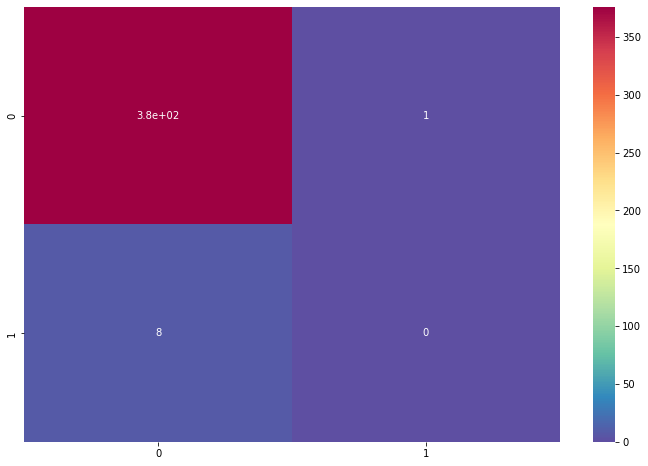

In [97]:
## Plot the confusion matrix

plt.figure(figsize = (12, 8))

cm = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm, annot = True, cmap = 'Spectral_r')
plt.show()

In [98]:
!pip install imblearn

In [99]:
from imblearn.over_sampling import SMOTE

In [100]:
sm = SMOTE(random_state=23)
X_sm,y_sm= sm.fit_resample(X, y)

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size = 0.2, random_state = 32)

In [102]:
# Fit the Logistic Regression Model

# create the instance of logistic regression model
clf1 = LogisticRegression()

# fit the model
clf1.fit(X_train, y_train)

LogisticRegression()

In [103]:
# Fit the Decision Tree Model

# create the instance of DT model
clf2 = DecisionTreeClassifier()

# fit the model
clf2.fit(X_train, y_train)

DecisionTreeClassifier()

In [104]:
# Make a prediction for the testing set
y_pred_lr1 = clf1.predict(X_test)
y_pred_dt2 = clf2.predict(X_test)

In [105]:
# print the accuracy on test data

print("Accuracy Score on test data with Logistic Regression:", accuracy_score(y_test, y_pred_lr1))
print("Accuracy Score on test data with Decision Tree:", accuracy_score(y_test, y_pred_dt2))

Accuracy Score on test data with Logistic Regression: 0.9157894736842105
Accuracy Score on test data with Decision Tree: 0.9710526315789474


In [106]:
# print the F1-score

print('F1 Score with LR:', f1_score(y_test, y_pred_lr1))
print('F1 Score with DT:', f1_score(y_test, y_pred_dt2))

F1 Score with LR: 0.917948717948718
F1 Score with DT: 0.9718670076726343


Text(87.0, 0.5, 'Truth')

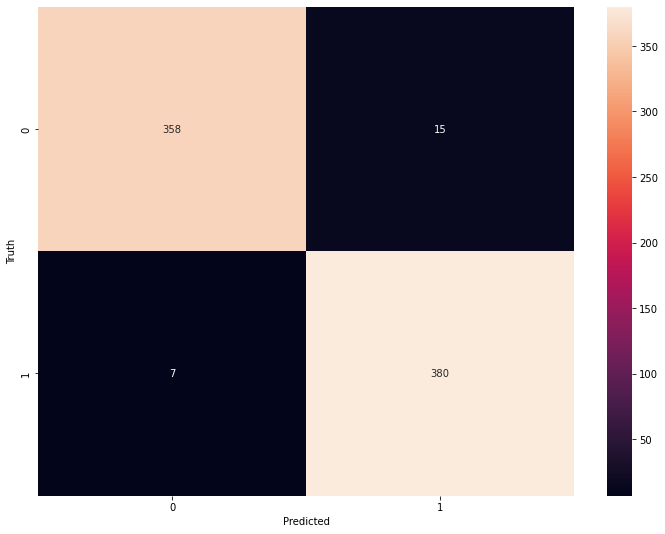

In [107]:
# Confusion Matrix

cm = confusion_matrix(y_test, y_pred_dt2)

plt.figure(figsize = (12, 9))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')